# Практическая работа №2. Хемоинформатика

In [1]:
!pip install pubchempy


In [2]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 26.4 MB/s eta 0:00:00


In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import numpy as np
from IPython.display import display,Image
import rdkit.Chem.Lipinski as Lipinksy
import requests
import pubchempy as pc
import time
from pubchempy import get_properties
from rdkit.Chem import Descriptors, Lipinski


## 1. На сайте PubChem найти *все* соединения c азидом для Click Chemistry и скачать их SMILES нотации

In [ ]:
def find_azids():
    compounds = []
    per_page = 10**5
    for smarts in ["N=[N+]=[N-]"]:
        for i in range(200):
            try:
                a = get_properties(
                    properties="CanonicalSMILES",
                    identifier=smarts,
                    namespace="smiles",
                    searchtype="substructure",
                    listkey_count=per_page,
                    listkey_start=i * per_page
                )
                compounds_batch = list(a)
                compounds.extend(compounds_batch)
                if len(compounds_batch) < per_page:
                    return compounds
                time.sleep(0.3)
            except Exception as e:
                print(f"Error on page {i+1}: {e}")
            print(f"Page {i} done")

compounds = find_azids()

Page 0 done
Page 1 done
Page 2 done
Page 3 done
Page 4 done
Page 5 done
Page 6 done
Page 7 done
Page 8 done
Page 9 done
Page 10 done
Page 11 done
Page 12 done
Page 13 done
Page 14 done
Page 15 done
Page 16 done
Page 17 done
Page 18 done
Page 19 done
Page 20 done
Page 21 done
Page 22 done
Page 23 done
Page 24 done


In [ ]:
len(compounds)

2518569

Это слишком много, на самом деле очень многие из них содержат кольцевые структуры с азидами, поэтому чуть уточним наш поиск:

In [4]:
def find_azids():
    compounds = []
    per_page = 10**5
    for smarts in ['N=[N+]=[N-]']:
        for i in range(200):
            try:
                a = get_properties(
                    properties="CanonicalSMILES",
                    identifier=smarts,
                    namespace="smiles",
                    searchtype="substructure",
                    RingsNotEmbedded=True,
                    listkey_count=per_page,
                    listkey_start=i * per_page
                )
                compounds_batch = list(a)
                compounds.extend(compounds_batch)
                if len(compounds_batch) < per_page:
                    return compounds
                time.sleep(0.3)
            except Exception as e:
                print(f"Error on page {i+1}: {e}")
            print(f"Page {i} done")

compounds = find_azids()

Page 0 done
Page 1 done
Page 2 done


In [5]:
len(compounds)

315107

In [6]:
compounds


[{'CID': 176728230,
  'ConnectivitySMILES': 'CCCCC(C)(CC(C)(CC(C)C1=CC=C(C=C1)CN=[N+]=[N-])C=O)C#N'},
 {'CID': 176727704,
  'ConnectivitySMILES': 'B1(OC(C(O1)(C)C)(C)C)C2=CC(=CC3=C2C(=C(C=C3)F)CC)N=NN(C)C'},
 {'CID': 176726384,
  'ConnectivitySMILES': 'CCCCCCCCCCCCCCCCCC(=O)OC1C(OC(C(C1OC(=O)CCCCCCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCCCCCC)OC2C(C(C(C(O2)CSCC[N+]#CI)OC(=O)CCCCCCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCCCCCC)CSCCCI=NN=[N+]=[N-]'},
 {'CID': 176726370,
  'ConnectivitySMILES': 'CCCCCCCCCCCCCC(=O)OC1C(OC(C(C1OC(=O)CCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCC)OC2C(C(C(C(O2)CSCC[N+]#CI)OC(=O)CCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCC)OC(=O)CCCCCCCCCCCCC)CSCCCI=NN=[N+]=[N-]'},
 {'CID': 176724149,
  'ConnectivitySMILES': 'CC1(OC2C(C3CCC(C2O1)(O3)CN=[N+]=[N-])N=[N+]=[N-])C'},
 {'CID': 176722639,
  'ConnectivitySMILES': 'CC(=O)C(CCCN=C(CCCSC1CC(=O)N(C1=O)OC(=O)COCCN=[N+]=[N-])N)NC'},
 {'CID': 176722636,
  'ConnectivitySMILES': 'CC(C)(C)OC(=O)CCCC(=O)N(C)OC(=O)N=[N+]=[N-]'},
 {'CID': 176722634,


## 2. Найти формулу ибупрофена и предложить способ изменения его SMILES для эмуляции реагента "Click Chemistry" (заменить изопропил на этин он же ацителен)

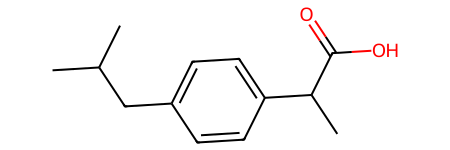

In [7]:
  ibu=Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
  AllChem.Compute2DCoords(ibu)
  display(ibu)


In [8]:
print (Lipinksy.NumHDonors(ibu))
print (Lipinksy.NumHAcceptors(ibu))
print (Lipinksy.rdMolDescriptors.CalcExactMolWt(ibu))
print (Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(ibu)[0])


1
1
206.130679816
3.073200000000001


Исходный ибупрофен: CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
Click-версия: C#CCC1=CC=C(C=C1)C(C)C(=O)O


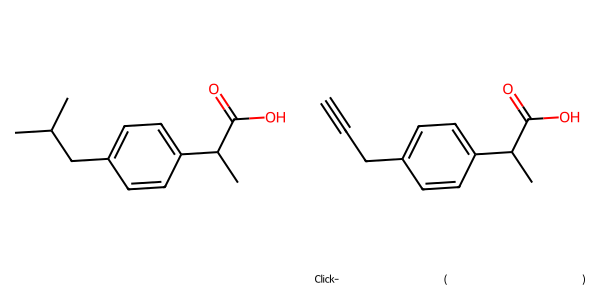

In [9]:
ibu_smiles = "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"

ibu_click_smiles = ibu_smiles.replace("CC(C)", "C#C", 1)  # заменяем только первое вхождение

print("Исходный ибупрофен:", ibu_smiles)
print("Click-версия:", ibu_click_smiles)

ibu = Chem.MolFromSmiles(ibu_smiles)
ibu_click = Chem.MolFromSmiles(ibu_click_smiles)

Draw.MolsToGridImage(
    [ibu, ibu_click],
    molsPerRow=2,
    subImgSize=(300, 300),
    legends=["Ибупрофен", "Click-версия (ацетилен)"]
)

### 3. Заменить в найденых радикалах азидную группу на модифцированный ибупрофен.

In [10]:
print("Тип compounds:", type(compounds))
print("Количество элементов:", len(compounds))
compounds[0]

Тип compounds: <class 'list'>
Количество элементов: 315107


{'CID': 176728230,
 'ConnectivitySMILES': 'CCCCC(C)(CC(C)(CC(C)C1=CC=C(C=C1)CN=[N+]=[N-])C=O)C#N'}

In [11]:
from random import shuffle, seed
smiles_list = [x["ConnectivitySMILES"] for x in compounds]
groups = ['N=[N+]=[N-]']
template = 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O'

result = []
for smi in smiles_list:
    for group in groups:
        if group in smi:
            newsmi = smi.replace(group, template)
            break
    else:
        continue
    try:
        new_mol=Chem.MolFromSmiles(newsmi) # переводим в молекулу по заданию
        if (Lipinksy.NumHDonors(new_mol) <= 5 and #отбор по правилу 5ти Липински
            Lipinksy.NumHAcceptors(new_mol) <= 10 and
            Lipinksy.rdMolDescriptors.CalcExactMolWt(new_mol) <=500 and
            Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(new_mol)[0] <= 5):
                result.append((new_mol, Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(new_mol)[0]))
    except Exception:
        continue

print(len(result))


Выходные данные были обрезаны до нескольких последних строк (5000).
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: not removing hydrogen atom without neighbors
[08:14:49] WARNING: no

69596


In [12]:
result.sort(key=lambda x: x[1])
mols = [x[0] for x in result]

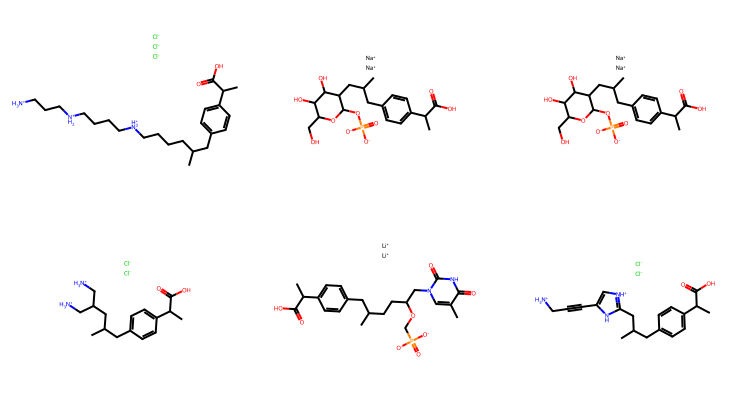

In [13]:
Draw.MolsToGridImage(mols[:6],useSVG=True, molsPerRow=3, subImgSize=(250, 200))